# <span style=color:blue><b>SPRINT 9 - Tarea M9 T01</b></span>  

## Análisis de sentimiento y textos


### <span style=color:red><b>Ejercicios</b></span>  
1. <span style=color:blue>Coge un texto en inglés que quieras, y **calcula la frecuencia de sus palabras.**</span>  
2. <span style=color:blue>Saca las **stopwords** y realiza **stemming** en tu conjunto de datos.</span>  
3. <span style=color:blue>Realiza **sentiment analysis** en tu conjunto de datos.</span>

**PROCEDIMIENTO A SEGUIR**

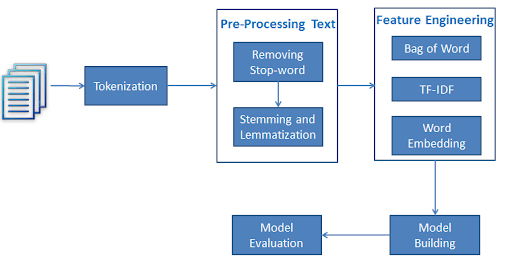

In [1]:
import pandas as pd   
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn import metrics


## 1. Tokenization

In [2]:
text = open("news.txt", encoding = "utf-8").read()

In [3]:
tokenized_text=sent_tokenize(text)
print(tokenized_text)

['Russia-Ukraine war latest: what we know on day 230 of the invasion.', 'Biden condemns Putin’s ‘brutality’ after missile strikes; UN general assembly rejects Russia’s call for secret ballot.', 'At least 19 people are reported to have been killed and 105 injured, Ukraine’s Emergency Services said in an update on Tuesday morning, after Russia launched a massive wave of strikes targeting cities across Ukraine.', 'Many of the locations hit by cruise missiles and kamikaze drones during the morning rush hour appeared to be solely civilian sites or key pieces of infrastructure, apparently chosen to terrorise Ukrainians.', 'Russian president Vladimir Putin said the wave of strikes on Ukraine was in response to the attack on the Kerch bridge linking Russia and Crimea.', 'The Russian leader warned of even more “severe retaliation” in the event of further Ukrainian attacks.', '“Let there be no doubt,” Putin said in televised comments addressed to his security council, “if attempts at terrorist a

### 1.1. Word Tokenization

In [4]:
tokenized_word=word_tokenize(text)
print(tokenized_word)

['Russia-Ukraine', 'war', 'latest', ':', 'what', 'we', 'know', 'on', 'day', '230', 'of', 'the', 'invasion', '.', 'Biden', 'condemns', 'Putin', '’', 's', '‘', 'brutality', '’', 'after', 'missile', 'strikes', ';', 'UN', 'general', 'assembly', 'rejects', 'Russia', '’', 's', 'call', 'for', 'secret', 'ballot', '.', 'At', 'least', '19', 'people', 'are', 'reported', 'to', 'have', 'been', 'killed', 'and', '105', 'injured', ',', 'Ukraine', '’', 's', 'Emergency', 'Services', 'said', 'in', 'an', 'update', 'on', 'Tuesday', 'morning', ',', 'after', 'Russia', 'launched', 'a', 'massive', 'wave', 'of', 'strikes', 'targeting', 'cities', 'across', 'Ukraine', '.', 'Many', 'of', 'the', 'locations', 'hit', 'by', 'cruise', 'missiles', 'and', 'kamikaze', 'drones', 'during', 'the', 'morning', 'rush', 'hour', 'appeared', 'to', 'be', 'solely', 'civilian', 'sites', 'or', 'key', 'pieces', 'of', 'infrastructure', ',', 'apparently', 'chosen', 'to', 'terrorise', 'Ukrainians', '.', 'Russian', 'president', 'Vladimir',

## 1.2. Frequency Distribution

In [5]:
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 454 samples and 1076 outcomes>


In [6]:
fdist.most_common(2)

[(',', 58), ('the', 45)]

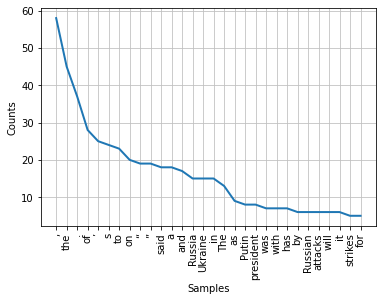

In [7]:
# Frequency Distribution Plot
fdist.plot(30,cumulative=False)
plt.show()

**Esta gráfica muestra la FRECUENCIA DE PALABRAS que más se repiten en el texto, como resultado tenemos varias STOPWORDS, sin embargo no considerando las mismas, las 3 palabras que más se repiten son:**
* SAID
* RUSSIA
* UKRAINE  
  
A continuación se muestra otra gráfica similar:

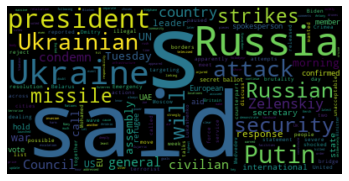

In [8]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 2. PRE-PROCESSING TEXT

### 2.1. Stopwords

In [9]:
stop_words=set(stopwords.words("english"))
print(stop_words)

{"should've", "doesn't", 'while', 'most', "weren't", 'been', "isn't", 'our', 'during', 'so', 't', 'wasn', 'them', 'couldn', 'but', "hadn't", 'yourself', 'not', 'me', 'had', 'am', 's', 'won', 'should', 'shan', 'they', 'he', 'haven', 'your', 'm', 'both', 'its', 'until', 'ourselves', 'weren', 'on', 'will', 'mightn', 'up', 'were', 'of', 'll', 'those', 'yours', "you've", 'wouldn', 'other', 'which', 'just', 'no', 'be', "don't", "haven't", 'same', 'or', 'and', 'herself', 'the', 'their', 'very', 'after', 'is', "it's", "mustn't", 'about', 'yourselves', 'any', 've', 'does', 'than', 'her', 'off', 'didn', 'ours', 'few', 'further', "aren't", "you'd", 'who', 'if', 'because', 'out', "hasn't", 'an', 'having', 'doesn', 'this', 'under', 'hasn', 'over', 'where', 'again', 'before', 'doing', 'needn', "mightn't", "wasn't", 'do', 'nor', 'itself', 'she', 'with', 'don', "couldn't", 'as', 'did', 'more', 'how', "you're", 'theirs', 'it', 'here', 'there', 'all', 'whom', 'him', 'hers', 'shouldn', 'from', 'for', 'hi

### 2.1.1 Removing Stopwords

In [10]:
filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_word)
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: ['Russia-Ukraine', 'war', 'latest', ':', 'what', 'we', 'know', 'on', 'day', '230', 'of', 'the', 'invasion', '.', 'Biden', 'condemns', 'Putin', '’', 's', '‘', 'brutality', '’', 'after', 'missile', 'strikes', ';', 'UN', 'general', 'assembly', 'rejects', 'Russia', '’', 's', 'call', 'for', 'secret', 'ballot', '.', 'At', 'least', '19', 'people', 'are', 'reported', 'to', 'have', 'been', 'killed', 'and', '105', 'injured', ',', 'Ukraine', '’', 's', 'Emergency', 'Services', 'said', 'in', 'an', 'update', 'on', 'Tuesday', 'morning', ',', 'after', 'Russia', 'launched', 'a', 'massive', 'wave', 'of', 'strikes', 'targeting', 'cities', 'across', 'Ukraine', '.', 'Many', 'of', 'the', 'locations', 'hit', 'by', 'cruise', 'missiles', 'and', 'kamikaze', 'drones', 'during', 'the', 'morning', 'rush', 'hour', 'appeared', 'to', 'be', 'solely', 'civilian', 'sites', 'or', 'key', 'pieces', 'of', 'infrastructure', ',', 'apparently', 'chosen', 'to', 'terrorise', 'Ukrainians', '.', 'Russian', 'pre

In [11]:
fdist2 = FreqDist(filtered_sent)

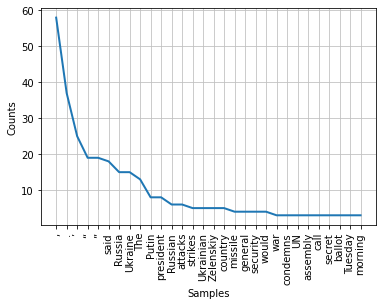

In [12]:
# Frequency Distribution Plot
fdist2.plot(30,cumulative=False)
plt.show()

**Gráfica de Frecuencia SIN STOPWORDS.**

### 2.2. Lexicon Normalization

### 2.2.1. Stemming
Stemming is a process of linguistic normalization, which reduces words to their word root word or chops off the derivational affixes. For example, connection, connected, connecting word reduce to a common word "connect".

In [13]:
ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)


Filtered Sentence: ['Russia-Ukraine', 'war', 'latest', ':', 'know', 'day', '230', 'invasion', '.', 'Biden', 'condemns', 'Putin', '’', '‘', 'brutality', '’', 'missile', 'strikes', ';', 'UN', 'general', 'assembly', 'rejects', 'Russia', '’', 'call', 'secret', 'ballot', '.', 'At', 'least', '19', 'people', 'reported', 'killed', '105', 'injured', ',', 'Ukraine', '’', 'Emergency', 'Services', 'said', 'update', 'Tuesday', 'morning', ',', 'Russia', 'launched', 'massive', 'wave', 'strikes', 'targeting', 'cities', 'across', 'Ukraine', '.', 'Many', 'locations', 'hit', 'cruise', 'missiles', 'kamikaze', 'drones', 'morning', 'rush', 'hour', 'appeared', 'solely', 'civilian', 'sites', 'key', 'pieces', 'infrastructure', ',', 'apparently', 'chosen', 'terrorise', 'Ukrainians', '.', 'Russian', 'president', 'Vladimir', 'Putin', 'said', 'wave', 'strikes', 'Ukraine', 'response', 'attack', 'Kerch', 'bridge', 'linking', 'Russia', 'Crimea', '.', 'The', 'Russian', 'leader', 'warned', 'even', '“', 'severe', 'retal

### 2.2.2. Lemmatization
Lemmatization reduces words to their base word, which is linguistically correct lemmas. It transforms root word with the use of vocabulary and morphological analysis. Lemmatization is usually more sophisticated than stemming. Stemmer works on an individual word without knowledge of the context. For example, The word "better" has "good" as its lemma. This thing will miss by stemming because it requires a dictionary look-up.

In [14]:
lem = WordNetLemmatizer()

lemma_words=[]
for w in stemmed_words:
    lemma_words.append(lem.lemmatize(w, "v"))

print("Stemmed words:",stemmed_words)
print("Lemmatized words:",lemma_words)


Stemmed words: ['russia-ukrain', 'war', 'latest', ':', 'know', 'day', '230', 'invas', '.', 'biden', 'condemn', 'putin', '’', '‘', 'brutal', '’', 'missil', 'strike', ';', 'un', 'gener', 'assembl', 'reject', 'russia', '’', 'call', 'secret', 'ballot', '.', 'at', 'least', '19', 'peopl', 'report', 'kill', '105', 'injur', ',', 'ukrain', '’', 'emerg', 'servic', 'said', 'updat', 'tuesday', 'morn', ',', 'russia', 'launch', 'massiv', 'wave', 'strike', 'target', 'citi', 'across', 'ukrain', '.', 'mani', 'locat', 'hit', 'cruis', 'missil', 'kamikaz', 'drone', 'morn', 'rush', 'hour', 'appear', 'sole', 'civilian', 'site', 'key', 'piec', 'infrastructur', ',', 'appar', 'chosen', 'terroris', 'ukrainian', '.', 'russian', 'presid', 'vladimir', 'putin', 'said', 'wave', 'strike', 'ukrain', 'respons', 'attack', 'kerch', 'bridg', 'link', 'russia', 'crimea', '.', 'the', 'russian', 'leader', 'warn', 'even', '“', 'sever', 'retali', '”', 'event', 'ukrainian', 'attack', '.', '“', 'let', 'doubt', ',', '”', 'putin', 

In [15]:
print (len(stemmed_words))
print (len(lemma_words))

754
754


**No se evidencia reducción de palabras luego de realizar "Lemmatization"**.

# Sentiment Analysis

Mediante **SentimentIntensityAnalyzer**, se determinará el sentimiento de cada frase, según los siguientes criterios:
* Positivo
* Negativo
* Nutral
* Compuesto


In [16]:
df = pd.DataFrame(tokenized_text, columns=['sentence'])

In [17]:
df.head()

,sentence
0,Russia-Ukraine war latest: what we know on day...
1,Biden condemns Putin’s ‘brutality’ after missi...
2,At least 19 people are reported to have been k...
3,Many of the locations hit by cruise missiles a...
4,Russian president Vladimir Putin said the wave...


In [18]:
sentiments = SentimentIntensityAnalyzer()

df['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in df['sentence']]
df['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in df['sentence']]
df['Neutral'] = [sentiments.polarity_scores(i)['neu'] for i in df['sentence']]
df['Compound'] = [sentiments.polarity_scores(i)['compound'] for i in df['sentence']]

In [19]:
df.head()

,sentence,Positive,Negative,Neutral,Compound
0,Russia-Ukraine war latest: what we know on day...,0.000,0.262,0.738,-0.5994
1,Biden condemns Putin’s ‘brutality’ after missi...,0.000,0.409,0.591,-0.8402
2,At least 19 people are reported to have been k...,0.035,0.287,0.678,-0.8957
3,Many of the locations hit by cruise missiles a...,0.000,0.117,0.883,-0.6249
4,Russian president Vladimir Putin said the wave...,0.000,0.196,0.804,-0.6808


In [20]:
score = df['Compound'].values
sentiment = []
for i in score:
    if i >= 0.05:
        sentiment.append(1) #POSITIVE
    elif i <= -0.05:
        sentiment.append(-1) #NEGATIVE
    else:
        sentiment.append(0) #NEUTRAL
        
df['Sentiment'] = sentiment
df.head()

,sentence,Positive,Negative,Neutral,Compound,Sentiment
0,Russia-Ukraine war latest: what we know on day...,0.000,0.262,0.738,-0.5994,-1
1,Biden condemns Putin’s ‘brutality’ after missi...,0.000,0.409,0.591,-0.8402,-1
2,At least 19 people are reported to have been k...,0.035,0.287,0.678,-0.8957,-1
3,Many of the locations hit by cruise missiles a...,0.000,0.117,0.883,-0.6249,-1
4,Russian president Vladimir Putin said the wave...,0.000,0.196,0.804,-0.6808,-1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sentence   37 non-null     object 
 1   Positive   37 non-null     float64
 2   Negative   37 non-null     float64
 3   Neutral    37 non-null     float64
 4   Compound   37 non-null     float64
 5   Sentiment  37 non-null     int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.9+ KB


In [22]:
df.Sentiment.value_counts()

-1    19
 1    10
 0     8
Name: Sentiment, dtype: int64

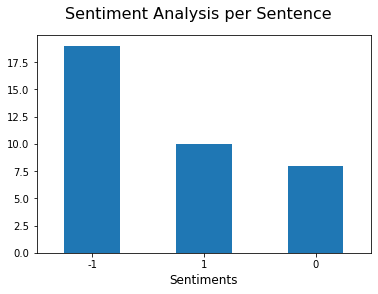

In [23]:
df['Sentiment'].value_counts().plot(kind='bar')
plt.suptitle('Sentiment Analysis per Sentence', fontsize=16)
plt.xlabel('Sentiments',fontsize=12)
plt.xticks(rotation=0)
plt.show()

**Como se puede observar en la gráfica, el texto analizado tiene un mayor contenido NEGATIVO (cerca del 50%)**

## Feature Generation using Bag of Words


In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(df['sentence'])


## Split train and test set

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, df['Sentiment'], test_size=0.2, random_state=1)

## Model Building and Evaluation

In [26]:
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [27]:
classifiers = {
    "BernoulliNB": BernoulliNB(),
    "ComplementNB": ComplementNB(),
    "MultinomialNB": MultinomialNB(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(),
    "MLPClassifier": MLPClassifier(max_iter=1000),
    "AdaBoostClassifier": AdaBoostClassifier(),
}

In [28]:
for name, sklearn_classifier in classifiers.items():
    clf = sklearn_classifier.fit(X_train, y_train)
    predicted= clf.predict(X_test)
    print(name, "- Accuracy:",metrics.accuracy_score(y_test, predicted))
    

BernoulliNB - Accuracy: 0.375
ComplementNB - Accuracy: 0.5
MultinomialNB - Accuracy: 0.25
KNeighborsClassifier - Accuracy: 0.375
DecisionTreeClassifier - Accuracy: 0.375
RandomForestClassifier - Accuracy: 0.375
LogisticRegression - Accuracy: 0.375
MLPClassifier - Accuracy: 0.375
AdaBoostClassifier - Accuracy: 0.375


**La mayor precisión obtenida es del 50% con los modelos: ComplementNB y MLPClassifier, sin embargo continua siendo un valor bajo.**

### Feature Generation using TF-IDF\
TF-IDF(Term Frequency-Inverse Document Frequency) normalizes the document term matrix

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(df['sentence'])

### Split train and test set (TF-IDF)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, df['Sentiment'], test_size=0.2, random_state=123)


### Model Building and Evaluation (TF-IDF)


In [31]:
for name, sklearn_classifier in classifiers.items():
    clf = sklearn_classifier.fit(X_train, y_train)
    predicted= clf.predict(X_test)
    print(name, "- Accuracy:",metrics.accuracy_score(y_test, predicted))

BernoulliNB - Accuracy: 0.625
ComplementNB - Accuracy: 0.625
MultinomialNB - Accuracy: 0.625
KNeighborsClassifier - Accuracy: 0.75
DecisionTreeClassifier - Accuracy: 0.25
RandomForestClassifier - Accuracy: 0.625
LogisticRegression - Accuracy: 0.625
MLPClassifier - Accuracy: 0.75
AdaBoostClassifier - Accuracy: 0.375


**Se logró mejorar el accurancy con un valor del 75%, con los modelos KNeighborsClassifier y MLPClassifier; es decir se logró una mejora del modelo en un 25%**